In [12]:
import numpy as np
import lbg_forecast.population_model as pop
import lbg_forecast.priors_mass_func as pr
import matplotlib.pyplot as plt
import scipy as sc
import prospect.models.transforms as ts
import lbg_forecast.sfh as sfh

In [13]:
def plot_corr(correlations, title):
    fig = plt.figure(figsize=(10,10))

    plt.matshow(correlations, fignum=fig, vmin=0.0, vmax=1.0)

    for (i, j), z in np.ndenumerate(correlations):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20)

    plt.title(title)
    plt.colorbar()
    plt.show()

def get_sfrs_in_bins(logm, logsfrratios, zs, agebins):
    sfrs = []

    i = 0
    while(i < logm.shape[0]):
        sfrs.append(ts.logsfr_ratios_to_sfrs(logm[i], logsfrratios[i, :], sfh.zred_to_agebins(zs[i], agebins)))
        i+=1

    sfrs = np.array(sfrs)
    return sfrs


In [3]:
#run = 'hpc120'
#real = 0
#ngals = 10000
#spsp = np.load("sps_parameter_samples/sps_"+run+".npy")[real, :ngals, :]
#spsp.shape

In [26]:
run = 'beta'
loaded_sps_parameters = np.load("sps_parameter_samples/sps_"+run+".npy")
loaded_photometry = np.load("photo_samples/photo_"+run+".npy")
total_spsp = []
total_phot = []
ngals = 10000
reals = 8
for real in range(reals):
    total_spsp.append(loaded_sps_parameters[real, :ngals, :])
    total_phot.append(loaded_photometry[real, :ngals, :])

In [27]:
band = 2
band_cut = 999
z_cut = 999

total_spsp = np.reshape(np.array(total_spsp), (reals*ngals, loaded_sps_parameters.shape[2]))
total_phot = np.reshape(np.array(total_phot), (reals*ngals, loaded_photometry.shape[2]))

total_spsp = total_spsp[np.where(total_phot[:, band] < band_cut)[0], :]
total_spsp = total_spsp[np.where(total_spsp[:, 0] < z_cut)[0], :]
total_spsp.shape

(80000, 17)

In [28]:
logsfrs = total_spsp[:, 10:-1]
zs = total_spsp[:, 0]
logmass = np.log10(total_spsp[:, -1])

sfrs = get_sfrs_in_bins(logmass, logsfrs, zs, sfh.default_agebins())


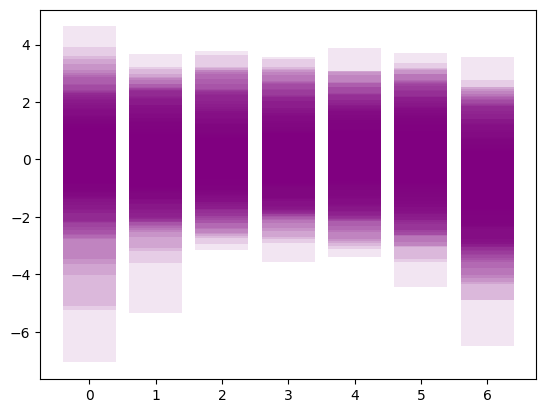

In [29]:
x = np.arange(0, 7, 1)
for i in range(100):
    plt.bar(x, np.log10(sfrs[i, :]), alpha=0.1, color='purple')

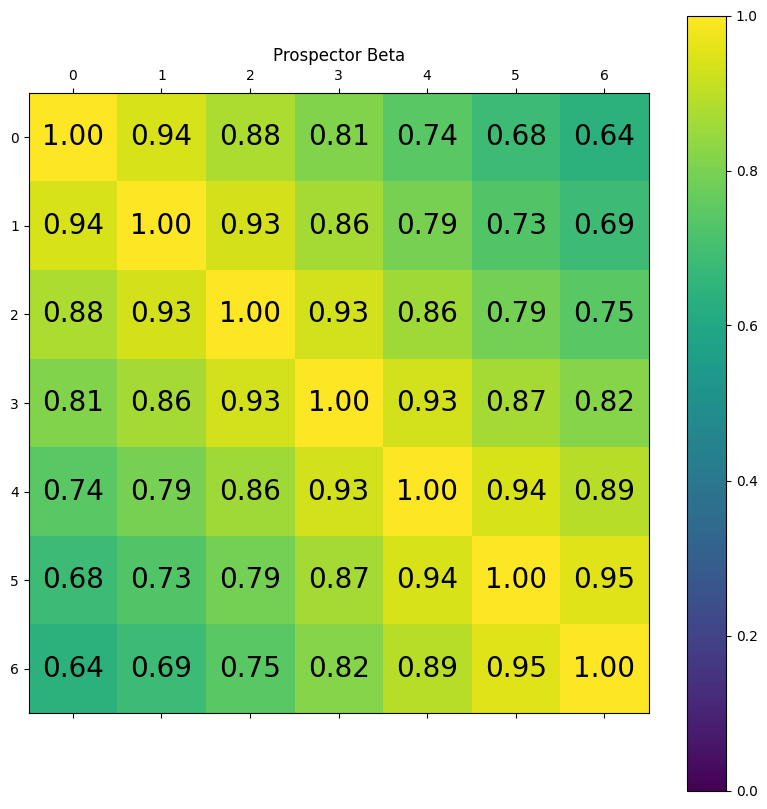

In [32]:
correlations = np.corrcoef(np.log10(sfrs.T))
plot_corr(correlations, "Prospector Beta")

In [9]:
popcosmos_data = np.load("dust_data/popcosmos_parameters_rmag_lt_25.npy")
nsamples = 500000
popcosmos_logsfrs = popcosmos_data[:nsamples, 2:8]
popcosmos_logm  = popcosmos_data[:nsamples, 0]
popcosmos_zs  = popcosmos_data[:nsamples, -1]

pop_sfrs = get_sfrs_in_bins(popcosmos_logm, popcosmos_logsfrs, popcosmos_zs, sfh.default_agebins())

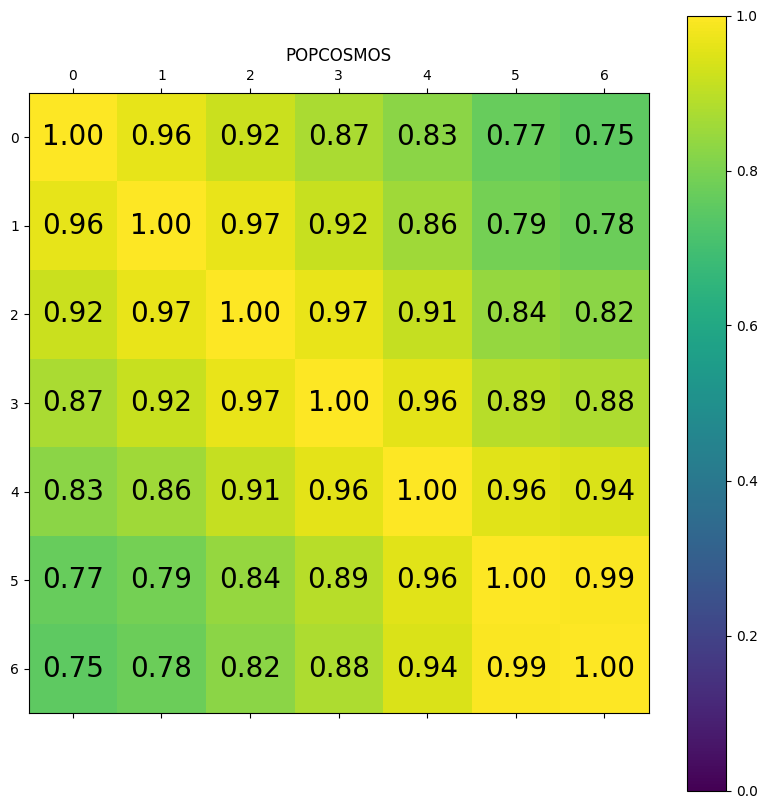

In [10]:
correlations = np.corrcoef(np.log10(pop_sfrs.T))
plot_corr(correlations, "POPCOSMOS")

(array([0.39334821, 0.41031964, 0.39281786, 0.40996607, 0.40572321,
        0.39582321, 0.393525  , 0.40660714, 0.40201071, 0.40059643,
        0.41049643, 0.41014286, 0.40077321, 0.39105   , 0.38698393,
        0.393525  , 0.39334821, 0.4096125 , 0.39334821, 0.40890536,
        0.40254107, 0.38963571, 0.40625357, 0.4170375 , 0.38592321,
        0.40324821, 0.38839821, 0.4071375 , 0.39900536, 0.38963571,
        0.39988929, 0.398475  , 0.39334821, 0.40607679, 0.39582321,
        0.15150536, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

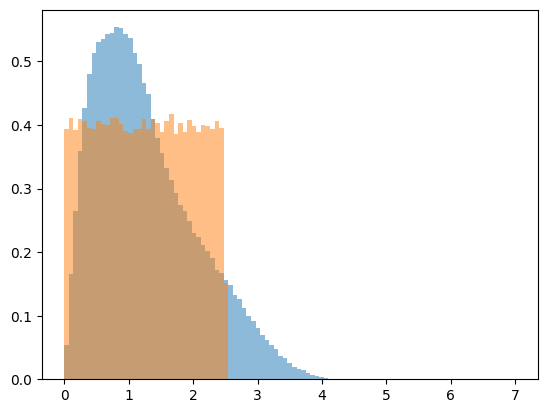

In [11]:
bins = np.linspace(0, 7, 100)
plt.hist(popcosmos_zs, bins=bins, density=True, alpha=0.5)
plt.hist(zs, bins=bins, density=True, alpha=0.5)